# Computational Fluid Dynamics

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [98]:
def fnk(x, derivative=0):
    if derivative == 1:
        return 0.1 + 2*x * (-1) * (1+x**2)**(-2)
    return 0.1*x + (1+x**2)**(-1)

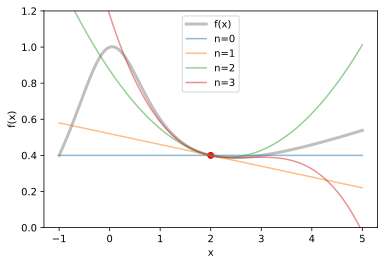

In [84]:
x = np.linspace(-1, 5, 100)
f = fnk(x)

x0 = 2.0

f0 = 0.1*x0 + (1+x0**2)**(-1)
fp0 = 0.1 + 2*x0 * (-1) * (1+x0**2)**(-2)
fpp0 = -2 * (1+x0**2)**(-2) + 8*x0**2  * (1+x0**2)**(-3)
fppp0 = 8*x0 * (1+x0**2)**(-3) + 16*x0 * (1+x0**2)**(-3) + -(48)*x0**3 * (1+x0**2)**(-4)

alpha = 0.5

plt.plot(x,f, lw=3, color='grey', alpha=alpha, label='f(x)')
plt.scatter(x0, f0, color='red')
plt.plot(x, f0*x**0, alpha=alpha, label='n=0')
plt.plot(x, f0 + (x-x0)*fp0, alpha=alpha, label='n=1')
plt.plot(x, f0 + (x-x0)*fp0 + 1/2*(x-x0)**2*fpp0, alpha=alpha, label='n=2')
plt.plot(x, f0 + (x-x0)*fp0 + 1/2*(x-x0)**2*fpp0 + 1/6*(x-x0)**3*fppp0, alpha=alpha, label='n=3')

plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(0, 1.2)
plt.show()

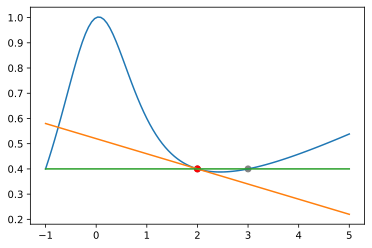

In [85]:
dx = 1

f_pdx = fnk(x0 + dx)
dy_fwd = f_pdx - f0

plt.plot(x, fnk(x))
plt.plot(x, f0 + fp0*(x-x0))
plt.scatter([x0, x0+dx], [f0, f_pdx], color='grey')
plt.scatter(x0, f0, color='red')

plt.plot(x, f0 + dy_fwd/dx*(x-x0))

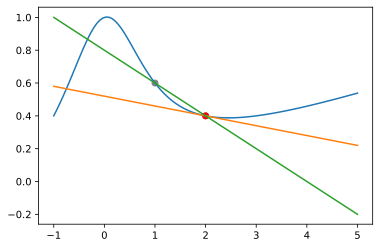

In [86]:
dx = 1

f_ndx = fnk(x0 - dx)
dy_bck = f0 - f_ndx

plt.plot(x, fnk(x))
plt.plot(x, f0 + fp0*(x-x0))
plt.scatter([x0, x0-dx], [f0, f_ndx], color='grey')
plt.scatter(x0, f0, color='red')

plt.plot(x, f0 + dy_bck/dx*(x-x0))

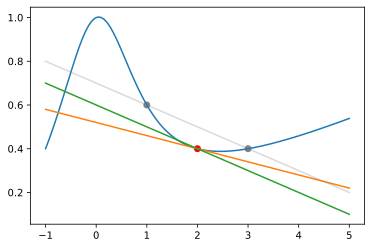

In [87]:
dx = 1

f_ndx = fnk(x0 - dx)
f_pdx = fnk(x0 + dx)
dy_cnt = f_pdx - f_ndx

plt.plot(x, fnk(x))
plt.plot(x, f0 + fp0*(x-x0))
plt.scatter([x0-dx, x0+dx], [f_ndx, f_pdx], color='grey')
plt.scatter(x0, f0, color='red')

plt.plot(x, f0 + dy_cnt/(2*dx)*(x-x0))
plt.plot(x, f_ndx + dy_cnt/(2*dx)*(x-x0+dx), color='grey', alpha=0.3)

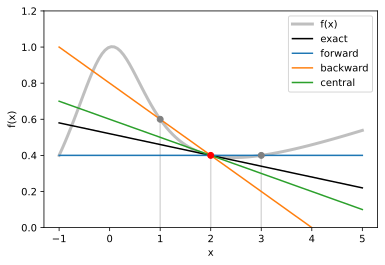

In [88]:
plt.plot(x, fnk(x), lw=3, color='grey', alpha=alpha, label='f(x)')

plt.plot(x, f0 + fp0*(x-x0), color='black', label='exact')

plt.plot(x, f0 + dy_fwd/dx*(x-x0), label='forward')
plt.plot(x, f0 + dy_bck/dx*(x-x0), label='backward')
plt.plot(x, f0 + dy_cnt/(2*dx)*(x-x0), label='central')

plt.scatter([x0-dx, x0+dx], [f_ndx, f_pdx], color='grey', zorder=5)
plt.scatter(x0, f0, color='red', zorder=5)

plt.vlines([x0-dx, x0, x0+dx], [0, 0, 0], [f_ndx, f0, f_pdx], color='grey', alpha=0.3)

plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(0, 1.2)
plt.show()

In [113]:
def central(x, y):
    yp = np.zeros_like(y)
    
    for i in range(1, len(x)-1):
        yp[i] = (y[i+1] - y[i-1]) / (x[i+1] - x[i-1])
        
    yp[0]  = (-3*y[ 0] + 4*y[ 1] - y[ 2]) / (x[ 2] - x[ 0])
    yp[-1] = ( 3*y[-1] - 4*y[-2] + y[-3]) / (x[-1] - x[-3])
    
    return yp

(-1.0, 1.2)

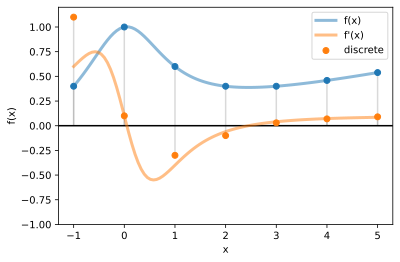

In [118]:
plt.axhline(y=0, color='black')
plt.plot(x, fnk(x), lw=3, color='C0', alpha=alpha, label='f(x)')
plt.plot(x, fnk(x, derivative=1), lw=3, color='C1', alpha=alpha, label="f'(x)")

dx = 1

px = np.arange(-1, 5 + 0.01*dx, dx)
pf = fnk(px)

plt.scatter( px, pf, color='C0', zorder=5)
plt.vlines( px, [0] * len(px), pf, color='grey', alpha=0.3)

pfp = central(px, pf)
plt.scatter( px, pfp, color='C1', zorder=5, label='discrete')
plt.vlines( px, [0] * len(px), pfp, color='grey', alpha=0.3)

plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-1, 1.2)


:::{figure-md} fig-fluid-time-setup

<img src="./figs/time_integration_1_setup.svg" width="80%" >

Time Integration.
:::

:::{figure-md} fig-fluid-time-explicit

<img src="./figs/time_integration_2_explicit.svg" width="80%" >

Time integration -- explicit Euler scheme.
:::

:::{figure-md} fig-fluid-time-implicit

<img src="./figs/time_integration_3_implicit.svg" width="80%" >

Time integration -- implicit Euler scheme.
:::

:::{figure-md} fig-fluid-time-twostep

<img src="./figs/time_integration_4_twostep.svg" width="80%" >

Time integration -- two step scheme.
:::

:::{figure-md} fig-fluid-time-predictorcorrector

<img src="./figs/time_integration_5_predictorcorrector.svg" width="80%" >

Time integration -- predictor-corrector scheme.
:::